In [ ]:
📌 Project Title

Sales Data Analysis using Python + SQLite + Pandas + Matplotlib

📌 What this project includes

Created or loaded SQLite database (sales_data.db)

Connected Python to SQLite using sqlite3

Wrote SQL queries to calculate total quantity and total revenue

Loaded data into Pandas

Visualized with bar charts

In [1]:
import sqlite3
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")
sample_data = [
    ("Laptop", 5, 60000),
    ("Mouse", 20, 500),
    ("Keyboard", 10, 1200),
    ("Monitor", 3, 15000),
    ("Headphones", 7, 2000)
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sample_data)
conn.commit()

conn.close()

print("Database created successfully as sales_data.db")

Database created successfully as sales_data.db


In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

print("Connected to database!")

Connected to database!


In [3]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
df

,product,total_quantity,total_revenue
0,Headphones,7,14000.0
1,Keyboard,10,12000.0
2,Laptop,5,300000.0
3,Monitor,3,45000.0
4,Mouse,20,10000.0


Matplotlib is building the font cache; this may take a moment.


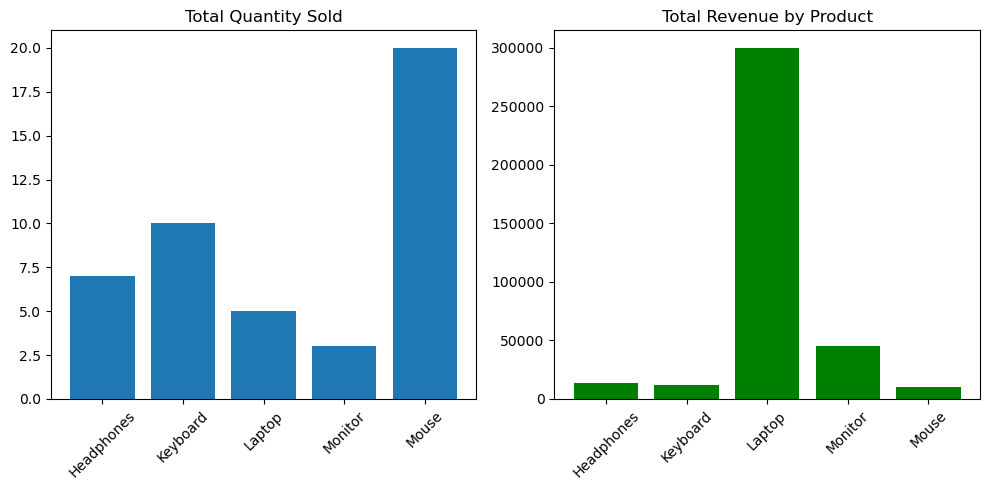

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))


plt.subplot(1, 2, 1)
plt.bar(df['product'], df['total_quantity'])
plt.title("Total Quantity Sold")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(df['product'], df['total_revenue'], color='green')
plt.title("Total Revenue by Product")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [5]:
pd.read_sql_query("SELECT SUM(quantity * price) AS total_revenue FROM sales", conn)

,total_revenue
0,381000.0


In [6]:
pd.read_sql_query("""
SELECT product, SUM(quantity) AS qty 
FROM sales 
GROUP BY product 
ORDER BY qty DESC 
LIMIT 1
""", conn)

,product,qty
0,Mouse,20


In [7]:
pd.read_sql_query("""
SELECT product, SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
LIMIT 1
""", conn)

,product,revenue
0,Laptop,300000.0
